목표: 변수간의 상관관계와 어떤 변수가 중요한 변수인지 파악해보자

데이터: 2019년 9월 1일부터 2019년 9월 30일 까지의 데이터

In [1]:
!unzip data13.zip

Archive:  data13.zip
  inflating: 행정_법정동 중심좌표.xlsx  
  inflating: test.csv                
  inflating: train.csv               
  inflating: submission_sample.csv   
  inflating: bus_bts.csv             


In [1]:
import numpy as np
import pandas as pd

In [4]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

station_name이 같아도 station_code가 다르기 때문에 station_name은 삭제

In [5]:
train=train.drop(labels='station_name',axis=1)
test=test.drop(labels='station_name',axis=1)

In [10]:
train['date']=pd.to_datetime(train['date'],format=('%Y-%m-%d'))
test['date']=pd.to_datetime(test['date'],format=('%Y-%m-%d'))

In [26]:
train

,id,date,bus_route_id,in_out,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,sum
0,0,2019-09-01,4270000,시외,344,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1,2019-09-01,4270000,시외,357,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,NaN
2,2,2019-09-01,4270000,시외,432,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN
3,3,2019-09-01,4270000,시내,1579,33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,NaN
4,4,2019-09-01,4270000,시내,1646,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,시내,1129,33.41437,126.26336,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
415419,415419,2019-09-30,32820000,시내,1564,33.49946,126.51479,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
415420,415420,2019-09-30,32820000,시내,2322,33.23100,126.26273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
415421,415421,2019-09-30,32820000,시내,3291,33.46483,126.31870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


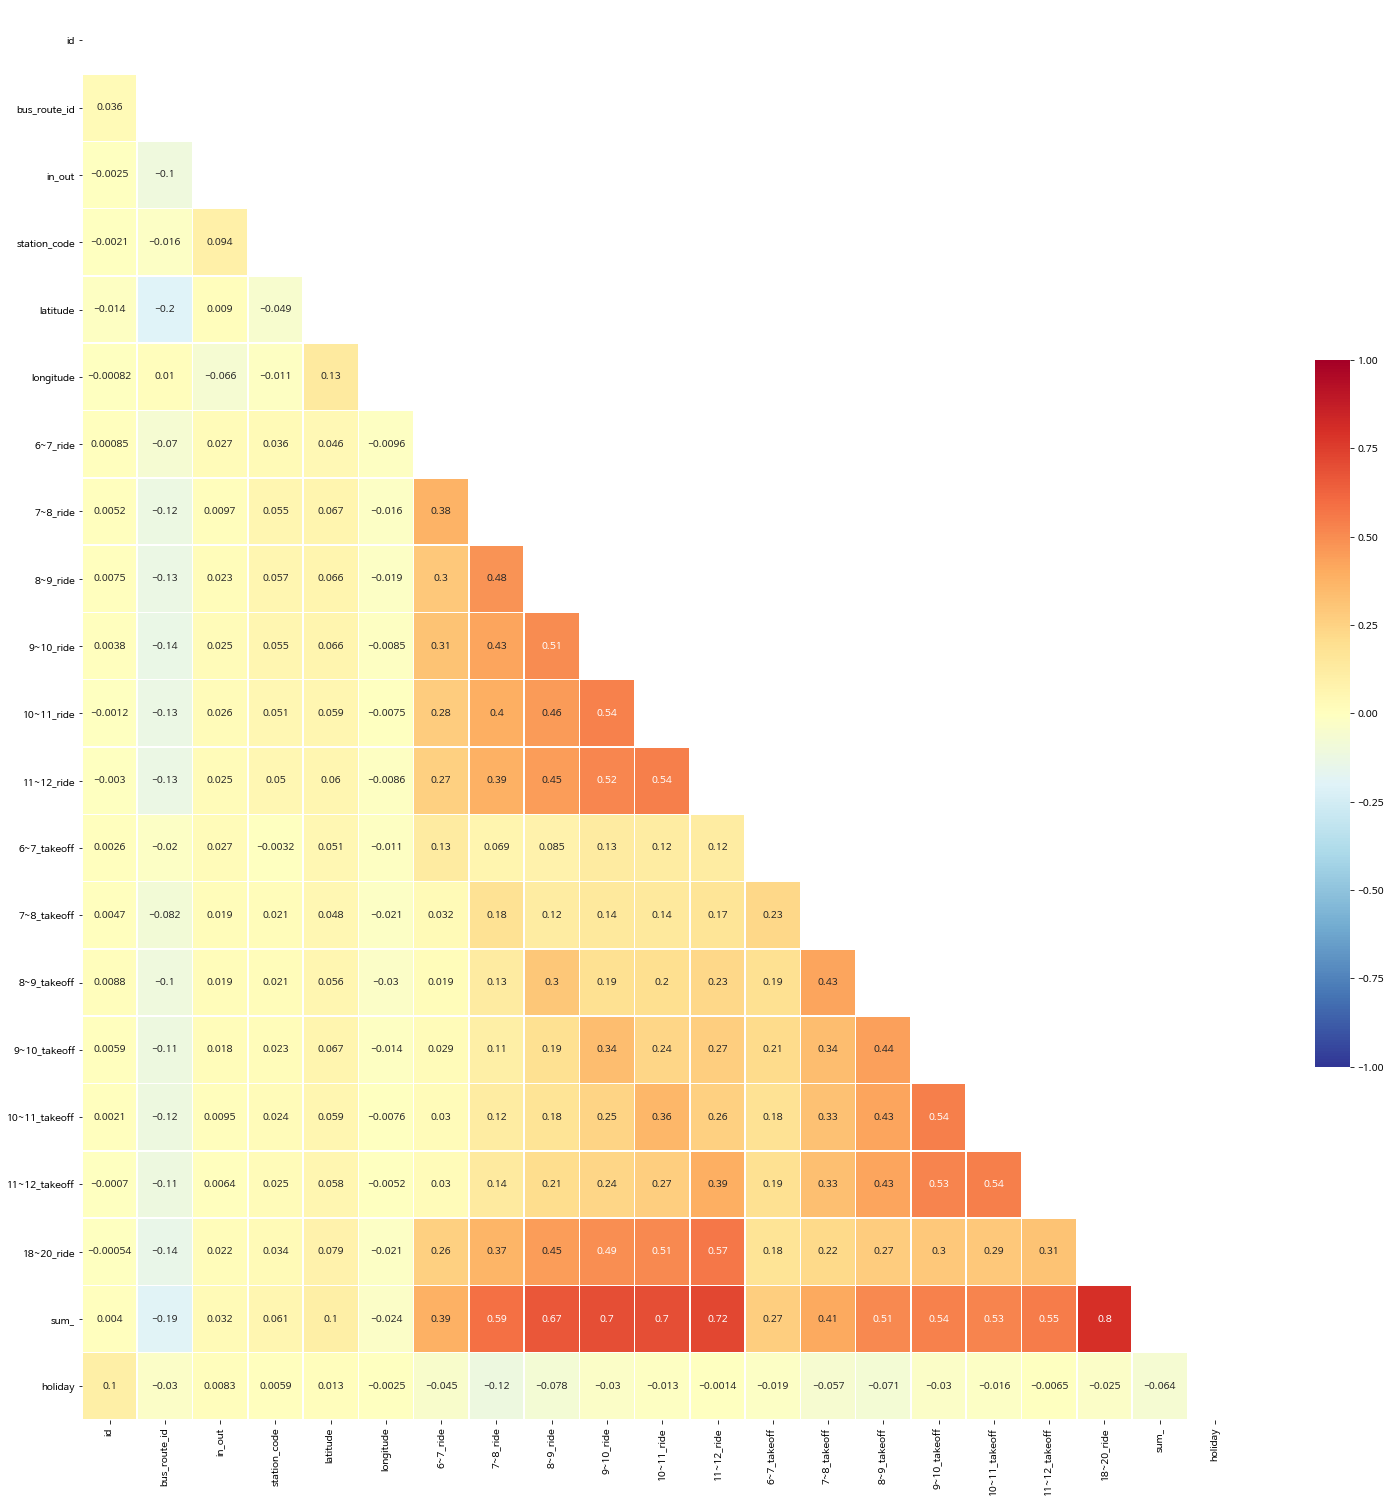

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

df = train.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(26,26) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
#삼각형 그리기
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

#1. plot을 통해 명절이나 공휴일같이 특별하게 승하차 인원이 적은 곳 파악

In [18]:
#plt에서 한글사용위해
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 13 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,647 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 146374 files and d

In [8]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

from matplotlib import font_manager, rc
import matplotlib.font_manager as fm

import warnings
warnings.filterwarnings(action='ignore')
import matplotlib

plt.rc('font', family='NanumBarunGothic') 
plt.rc('axes', unicode_minus=False)

In [9]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumSquare', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'),
 ('NanumMyeongjo', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'),
 ('NanumSquareRound', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf'),
 ('NanumSquareRound', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf'),
 ('NanumSquare', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf'),
 ('NanumBarunGothic',
  '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'),
 ('NanumGothic', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'),
 ('NanumBarunGothic', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'),
 ('NanumMyeongjo', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'),
 ('NanumGothic', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf')]

공휴일 column 생성하기-> 휴일:1 / 평일: 0

In [133]:
train_str=['6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride',
       '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff', '8~9_takeoff',
       '9~10_takeoff', '10~11_takeoff', '11~12_takeoff', '18~20_ride']
train['sum_']=train[train_str].sum(axis=1)
train

,id,date,bus_route_id,in_out,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,holiday,sum_
0,0,2019-09-01,4270000,1,344,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,16.0
1,1,2019-09-01,4270000,1,357,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0,27.0
2,2,2019-09-01,4270000,1,432,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,6.0
3,3,2019-09-01,4270000,0,1579,33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0,132.0
4,4,2019-09-01,4270000,0,1646,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,0,1129,33.41437,126.26336,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0
415419,415419,2019-09-30,32820000,0,1564,33.49946,126.51479,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0
415420,415420,2019-09-30,32820000,0,2322,33.23100,126.26273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0
415421,415421,2019-09-30,32820000,0,3291,33.46483,126.31870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0


In [134]:
test_str=['6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride',
       '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff', '8~9_takeoff',
       '9~10_takeoff', '10~11_takeoff', '11~12_takeoff']
test['sum_']=test[test_str].sum(axis=1)
test

,id,date,bus_route_id,in_out,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,sum_,holiday
0,415423,2019-10-01,4270000,1,344,33.48990,126.49373,4.0,4.0,7.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0,0
1,415424,2019-10-01,4270000,1,357,33.48944,126.48508,1.0,6.0,6.0,1.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0
2,415425,2019-10-01,4270000,1,432,33.48181,126.47352,2.0,4.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0
3,415426,2019-10-01,4270000,0,1579,33.50577,126.49252,1.0,11.0,18.0,8.0,26.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,0
4,415427,2019-10-01,4270000,0,1636,33.24872,126.41032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228165,643588,2019-10-16,32820000,0,786,33.30073,126.18044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0
228166,643589,2019-10-16,32820000,0,1080,33.46262,126.33447,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
228167,643590,2019-10-16,32820000,0,1129,33.41437,126.26336,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0
228168,643591,2019-10-16,32820000,0,1564,33.49946,126.51479,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0


In [49]:
count=train.groupby(['date'])['sum_'].sum().reset_index()
count_test=test.groupby(['date'])['sum_'].sum().reset_index()

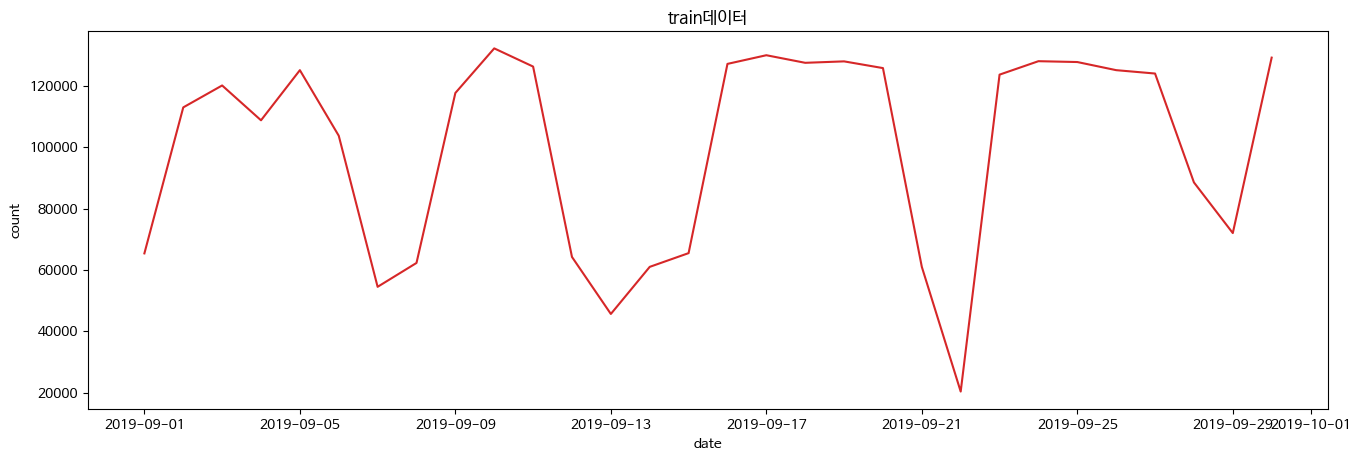

In [47]:
plt.figure(figsize=(16,5),dpi=100)
plt.plot(count.date, count.sum_, color='tab:red')
plt.gca().set(title="train데이터", xlabel="date", ylabel="count")
plt.show()

    train 데이터
        
        2019년 9월 7일 ->토요일

          8일->일요일

          12일->목요일, 추석전날

          13일->금요일 ,추석

          14일->토요일, 추석다음날

          15일->일요일

          21일->토요일

          22일->일요일
          
          28일->토요일

          29일->일요일

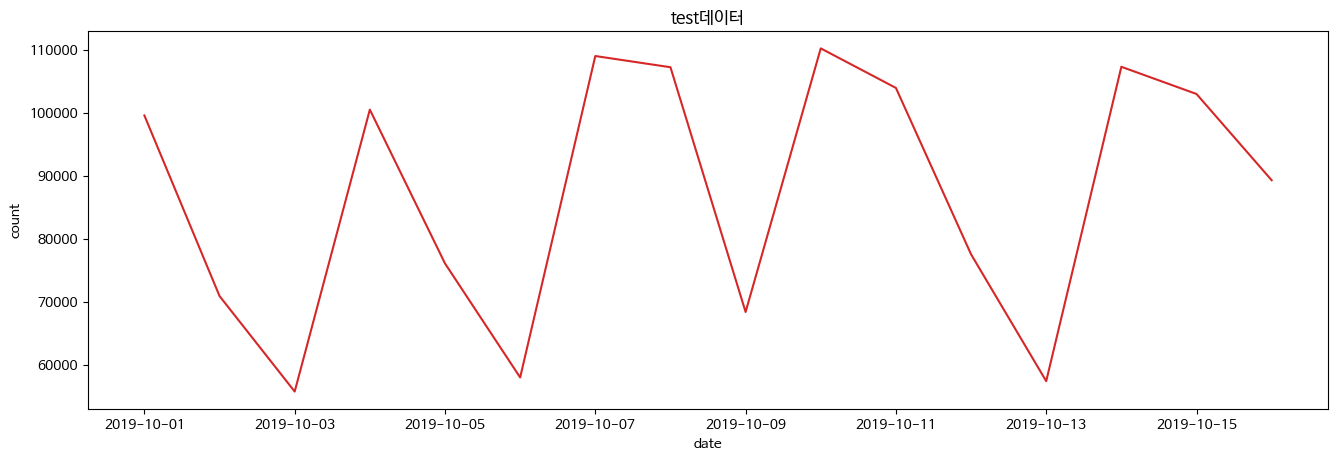

In [50]:
plt.figure(figsize=(16,5),dpi=100)
plt.plot(count_test.date, count_test.sum_, color='tab:red')
plt.gca().set(title="test데이터", xlabel="date", ylabel="count")
plt.show()

    test데이터

      2019년 10월 3일-> 목요일, 개천절
            10월 5일->토요일
            10월 6일 ->일요일
            10월 9일 -> 수요일, 한글날
            10월 12일->토요일
            10월 13일 -> 일요일


In [88]:
holiday_train=['2019-09-07','2019-09-08','2019-09-12','2019-09-13','2019-09-14','2019-09-15','2019-09-21',
               '2019-09-22','2019-09-28','2019-09-29']
#똑같이 pandas datetime형이여야 함
i=0
holiday_train=pd.to_datetime(holiday_train,format='%Y-%m-%d')
#질문 apply안에 반복문 은 어떻게 사용할까
#train['holiday']=train['date'].apply(lambda x : 1   if x==holiday_train[i] else 0 for i in range(10))

train['holiday']=train['date'].apply(lambda x : 1  if x==holiday_train[0]  or x==holiday_train[1] or x==holiday_train[2] or x==holiday_train[3] or x==holiday_train[4] or x==holiday_train[5] or x==holiday_train[6] or x==holiday_train[7] or x==holiday_train[8] or x==holiday_train[9] else 0 )



In [95]:
train[train['date']=='2019-09-29']

,id,date,bus_route_id,in_out,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,sum_,holiday
387415,387415,2019-09-29,4270000,시외,344,33.48990,126.49373,1.0,2.0,4.0,3.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,1
387416,387416,2019-09-29,4270000,시외,357,33.48944,126.48508,0.0,3.0,9.0,2.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,24.0,1
387417,387417,2019-09-29,4270000,시외,432,33.48181,126.47352,1.0,3.0,2.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,1
387418,387418,2019-09-29,4270000,시내,1579,33.50577,126.49252,9.0,12.0,10.0,24.0,17.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,151.0,1
387419,387419,2019-09-29,4270000,시내,1646,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399534,399534,2019-09-29,32810000,시내,28,33.49390,126.43440,0.0,2.0,1.0,8.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,14.0,1
399535,399535,2019-09-29,32810000,시내,45,33.48578,126.41171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,1
399536,399536,2019-09-29,32810000,시내,878,33.35053,126.18334,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
399537,399537,2019-09-29,32820000,시내,1129,33.41437,126.26336,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1


In [96]:
holiday_test=['2019-10-03','2019-10-05','2019-10-06','2019-10-09','2019-10-12','2019-10-13']
#똑같이 pandas datetime형이여야 함
i=0
holiday_test=pd.to_datetime(holiday_test,format='%Y-%m-%d')
#질문 apply안에 반복문 은 어떻게 사용할까
#train['holiday']=train['date'].apply(lambda x : 1   if x==holiday_train[i] else 0 for i in range(10))

test['holiday']=test['date'].apply(lambda x : 1  if x==holiday_test[0]  or x==holiday_test[1] or x==holiday_test[2] or x==holiday_test[3] or x==holiday_test[4] or x==holiday_test[5] else 0 )



In [98]:
test

,id,date,bus_route_id,in_out,station_code,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,sum_,holiday
0,415423,2019-10-01,4270000,시외,344,33.48990,126.49373,4.0,4.0,7.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0,0
1,415424,2019-10-01,4270000,시외,357,33.48944,126.48508,1.0,6.0,6.0,1.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0
2,415425,2019-10-01,4270000,시외,432,33.48181,126.47352,2.0,4.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0
3,415426,2019-10-01,4270000,시내,1579,33.50577,126.49252,1.0,11.0,18.0,8.0,26.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,0
4,415427,2019-10-01,4270000,시내,1636,33.24872,126.41032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228165,643588,2019-10-16,32820000,시내,786,33.30073,126.18044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0
228166,643589,2019-10-16,32820000,시내,1080,33.46262,126.33447,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
228167,643590,2019-10-16,32820000,시내,1129,33.41437,126.26336,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0
228168,643591,2019-10-16,32820000,시내,1564,33.49946,126.51479,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0


In [100]:
train['holiday']=train['date'].apply(lambda x : 1  if x==holiday_train[i] else 0 for i in range(10))

TypeError: ignored

In [104]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

train['in_out']=encoder.fit_transform(train['in_out'])
test['in_out']=encoder.fit_transform(test['in_out'])

In [126]:
train.columns

Index(['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'latitude',
       'longitude', '6~7_ride', '7~8_ride', '8~9_ride', '9~10_ride',
       '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff', '8~9_takeoff',
       '9~10_takeoff', '10~11_takeoff', '11~12_takeoff', '18~20_ride',
       'holiday'],
      dtype='object')

##shap과 eli5으로 상관관계 확인해보기

In [135]:
from sklearn.model_selection import train_test_split

train_split, val_split = train_test_split(train, test_size=0.3,random_state=1)
target = '18~20_ride'
cols_to_drop=[target,'id','date']
cols_to_fit = [col for col in train.columns if col not in cols_to_drop]

In [115]:
# eli5 library download
!pip install eli5

     |████████████████████████████████| 112kB 9.2MB/s 


In [116]:
# shap library download
!pip install shap

     |████████████████████████████████| 358kB 7.3MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp36-cp36m-linux_x86_64.whl size=489406 sha256=67a5f166d482844cbc1a3e0e1e1313eb4a24b6e6d22305ba4b63846d9ef047c1
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


In [136]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import eli5
from eli5.sklearn import PermutationImportance

import shap

In [120]:
#train=train.drop('sum_',axis=1)

In [137]:

corr = train.corr().unstack().sort_values(ascending=False).drop_duplicates()
corr.drop(corr.index[0],inplace=True)
display(corr.head())
display(corr.tail())

sum_        18~20_ride    0.800970
11~12_ride  sum_          0.723059
9~10_ride   sum_          0.702132
sum_        10~11_ride    0.697488
            8~9_ride      0.670777
dtype: float64

11~12_ride    bus_route_id   -0.129354
9~10_ride     bus_route_id   -0.137973
bus_route_id  18~20_ride     -0.143702
              sum_           -0.190320
latitude      bus_route_id   -0.196758
dtype: float64

#lightGBM

[10]	valid_0's l2: 5.4271	valid_0's l1: 0.964761
[20]	valid_0's l2: 4.06466	valid_0's l1: 0.840705
[30]	valid_0's l2: 3.28774	valid_0's l1: 0.779323
[40]	valid_0's l2: 2.81744	valid_0's l1: 0.71908
[50]	valid_0's l2: 2.44834	valid_0's l1: 0.670396
[60]	valid_0's l2: 2.17287	valid_0's l1: 0.628358
[70]	valid_0's l2: 1.98955	valid_0's l1: 0.592778
[80]	valid_0's l2: 1.81752	valid_0's l1: 0.562595
[90]	valid_0's l2: 1.67937	valid_0's l1: 0.531944
[100]	valid_0's l2: 1.55926	valid_0's l1: 0.503874


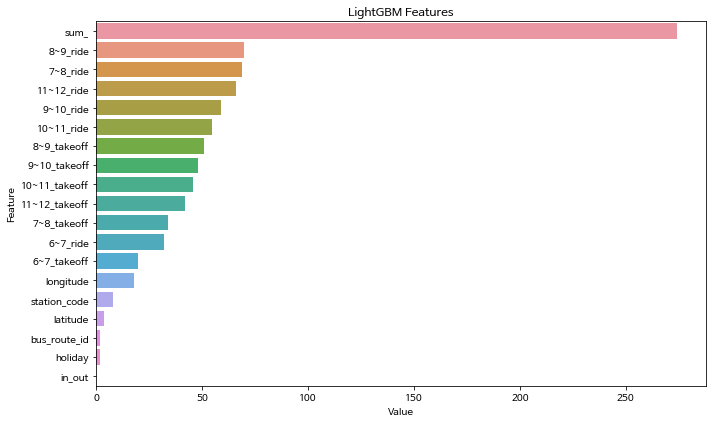

Weight,Feature
10.5700 ± 0.0705,sum_
0.1171 ± 0.0007,7~8_ride
0.1073 ± 0.0016,8~9_ride
0.0747 ± 0.0009,9~10_ride
0.0735 ± 0.0012,8~9_takeoff
0.0697 ± 0.0008,10~11_ride
0.0691 ± 0.0009,11~12_takeoff
0.0627 ± 0.0007,11~12_ride
0.0555 ± 0.0022,10~11_takeoff
0.0488 ± 0.0005,9~10_takeoff


In [138]:
from lightgbm import LGBMRegressor
params = {
    'n_estimators': 100,
    'learning_rate': 0.3, 
    'num_leaves': 10,
    'objective': 'regression_l2', 
    'metric': ['mae', 'mse'],
    'verbose': -1,
}

lgbm_model = LGBMRegressor(**params)
lgbm_model.fit(
    train_split[cols_to_fit], train_split[target],
    eval_set=[(val_split[cols_to_fit], val_split[target])],
    eval_metric=['mae', 'mse'],
    verbose=10,
)

feature_importance = pd.DataFrame(sorted(zip(lgbm_model.feature_importances_, cols_to_fit)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

perm = PermutationImportance(lgbm_model).fit(val_split[cols_to_fit], val_split[target])
eli5.show_weights(perm, feature_names=list(cols_to_fit))

'sum_'이 압도적으로 커서 빼고 진행해봄

[10]	valid_0's l2: 10.8065	valid_0's l1: 1.23319
[20]	valid_0's l2: 9.80262	valid_0's l1: 1.1567
[30]	valid_0's l2: 9.52381	valid_0's l1: 1.13817
[40]	valid_0's l2: 9.2441	valid_0's l1: 1.12748
[50]	valid_0's l2: 9.14082	valid_0's l1: 1.12191
[60]	valid_0's l2: 8.95983	valid_0's l1: 1.11089
[70]	valid_0's l2: 8.86969	valid_0's l1: 1.10541
[80]	valid_0's l2: 8.80492	valid_0's l1: 1.10026
[90]	valid_0's l2: 8.74284	valid_0's l1: 1.09772
[100]	valid_0's l2: 8.69275	valid_0's l1: 1.09356


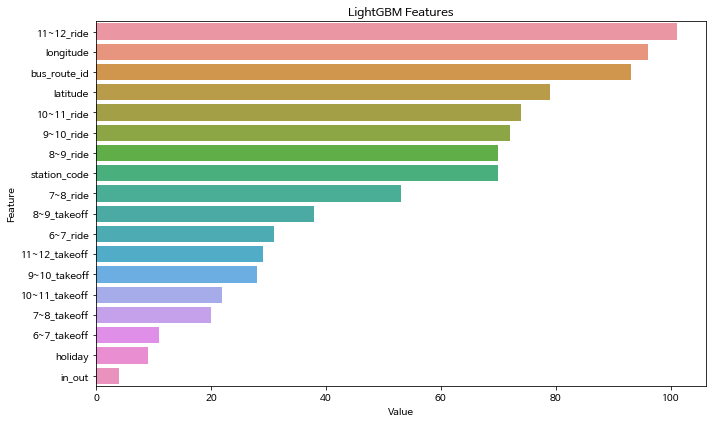

Weight,Feature
0.1089 ± 0.0031,longitude
0.1057 ± 0.0012,11~12_ride
0.0790 ± 0.0014,10~11_ride
0.0591 ± 0.0047,latitude
0.0517 ± 0.0051,station_code
0.0441 ± 0.0097,bus_route_id
0.0414 ± 0.0080,8~9_ride
0.0258 ± 0.0023,9~10_ride
0.0229 ± 0.0022,7~8_ride
0.0149 ± 0.0083,holiday


In [139]:

cols_to_drop=[target,'id','date','sum_']
cols_to_fit = [col for col in train.columns if col not in cols_to_drop]


from lightgbm import LGBMRegressor
params = {
    'n_estimators': 100,
    'learning_rate': 0.3, 
    'num_leaves': 10,
    'objective': 'regression_l2', 
    'metric': ['mae', 'mse'],
    'verbose': -1,
}

lgbm_model = LGBMRegressor(**params)
lgbm_model.fit(
    train_split[cols_to_fit], train_split[target],
    eval_set=[(val_split[cols_to_fit], val_split[target])],
    eval_metric=['mae', 'mse'],
    verbose=10,
)

feature_importance = pd.DataFrame(sorted(zip(lgbm_model.feature_importances_, cols_to_fit)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

perm = PermutationImportance(lgbm_model).fit(val_split[cols_to_fit], val_split[target])
eli5.show_weights(perm, feature_names=list(cols_to_fit))

#XGB

sum_빼고 진행

[06:52:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4.26015
[10]	validation_0-rmse:3.40204
[20]	validation_0-rmse:3.31878
[30]	validation_0-rmse:3.25934
[40]	validation_0-rmse:3.20159
[50]	validation_0-rmse:3.12288
[60]	validation_0-rmse:3.10481
[70]	validation_0-rmse:3.09582
[80]	validation_0-rmse:3.08464
[90]	validation_0-rmse:3.07947
[99]	validation_0-rmse:3.06789


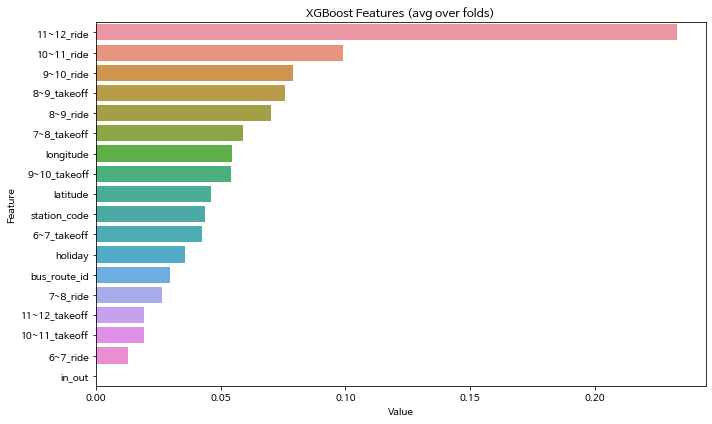

Weight,Feature
0.1279 ± 0.0045,11~12_ride
0.0533 ± 0.0010,10~11_ride
0.0503 ± 0.0040,station_code
0.0432 ± 0.0042,longitude
0.0348 ± 0.0028,8~9_ride
0.0340 ± 0.0018,bus_route_id
0.0338 ± 0.0020,9~10_ride
0.0226 ± 0.0012,latitude
0.0143 ± 0.0018,10~11_takeoff
0.0124 ± 0.0006,7~8_ride


In [140]:
from xgboost import XGBRegressor
params = {
    'n_estimators': 100,
    'learning_rate': 0.3, 
    'num_leaves': 10,
    'verbose': -1,
}

xgb_model = XGBRegressor(**params)
xgb_model.fit(
    train_split[cols_to_fit], train_split[target],
    eval_set=[(val_split[cols_to_fit], val_split[target])],
    verbose=10,
)

feature_importance = pd.DataFrame(sorted(zip(xgb_model.feature_importances_, cols_to_fit)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('XGBoost Features (avg over folds)')
plt.tight_layout()
plt.show()

perm = PermutationImportance(xgb_model).fit(val_split[cols_to_fit], val_split[target])
eli5.show_weights(perm, feature_names=list(cols_to_fit))

[06:54:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3.84075
[10]	validation_0-rmse:2.43385
[20]	validation_0-rmse:2.19889
[30]	validation_0-rmse:2.05117
[40]	validation_0-rmse:1.91263
[50]	validation_0-rmse:1.80264
[60]	validation_0-rmse:1.69803
[70]	validation_0-rmse:1.60794
[80]	validation_0-rmse:1.53503
[90]	validation_0-rmse:1.46832
[99]	validation_0-rmse:1.41314


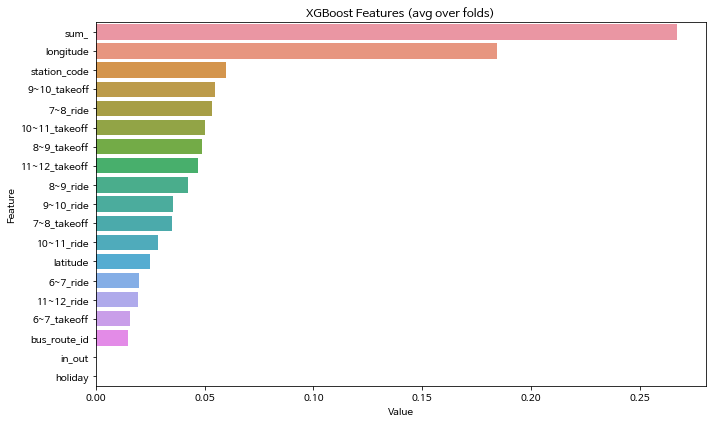

Weight,Feature
7.3760 ± 0.0392,sum_
0.1162 ± 0.0007,8~9_ride
0.1009 ± 0.0007,7~8_ride
0.0659 ± 0.0004,9~10_ride
0.0610 ± 0.0004,11~12_takeoff
0.0608 ± 0.0012,8~9_takeoff
0.0603 ± 0.0004,10~11_ride
0.0512 ± 0.0015,10~11_takeoff
0.0498 ± 0.0005,11~12_ride
0.0475 ± 0.0011,9~10_takeoff


In [142]:
cols_to_drop=[target,'id','date']
cols_to_fit = [col for col in train.columns if col not in cols_to_drop]

from xgboost import XGBRegressor
params = {
    'n_estimators': 100,
    'learning_rate': 0.3, 
    'num_leaves': 10,
    'verbose': -1,
}

xgb_model = XGBRegressor(**params)
xgb_model.fit(
    train_split[cols_to_fit], train_split[target],
    eval_set=[(val_split[cols_to_fit], val_split[target])],
    verbose=10,
)

feature_importance = pd.DataFrame(sorted(zip(xgb_model.feature_importances_, cols_to_fit)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('XGBoost Features (avg over folds)')
plt.tight_layout()
plt.show()

perm = PermutationImportance(xgb_model).fit(val_split[cols_to_fit], val_split[target])
eli5.show_weights(perm, feature_names=list(cols_to_fit))

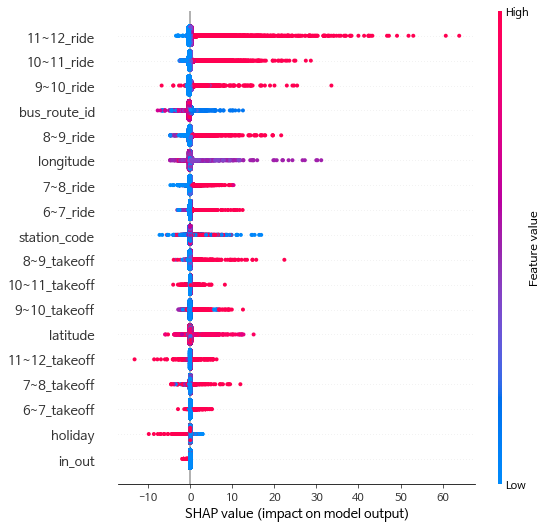

In [145]:
cols_to_drop=[target,'id','date','sum_']
cols_to_fit = [col for col in train.columns if col not in cols_to_drop]


# lightBGM 모델을 해석하기 위해 Shap Value로 구현 및 시각화
explainer = shap.TreeExplainer(lgbm_model)
shap_values = explainer.shap_values(val_split[cols_to_fit])
shap.summary_plot(shap_values, val_split[cols_to_fit])

# 빨간색 : target ( avg_score ) 에 대해 양의 영향력
# 파란색 : target ( avg_score ) 에 대해 음의 영향력

'sum_'을 추가하면 에러가 남

In [146]:
cols_to_drop=[target,'id','date']
cols_to_fit = [col for col in train.columns if col not in cols_to_drop]


# lightBGM 모델을 해석하기 위해 Shap Value로 구현 및 시각화
explainer = shap.TreeExplainer(lgbm_model)
shap_values = explainer.shap_values(val_split[cols_to_fit])
shap.summary_plot(shap_values, val_split[cols_to_fit])

# 빨간색 : target ( avg_score ) 에 대해 양의 영향력
# 파란색 : target ( avg_score ) 에 대해 음의 영향력

Exception: ignored

퇴근시간 버스승차인원 이기 때문에 출근시간대의 버스 승하차 정보가 가장 많은 영향줄것이라 생각했는데 아니었음

-> (11~12시정오시간대가 가장 큰 영향 줌)

앞으로 할거 : 날씨 데이터 (강수량 유/무)

시간대별 승하차 인원을 어떻게 처리할 것인가('sum_'처럼 좀더 극대화해서 데이터를 표현하는 feature를 사용?)

위도경도 정보 활용 